# Word Cloud
Create a word cloud by reading a text file

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing C:\Users\Owner\Anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\Owner\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\Owner\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\Owner\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


In [2]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()


FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

In [3]:
#Use this code to read directly from a given file instead of browsing and uploading file
with open(r'C:\Users\Owner\Documents\KTMADVReview.txt', 'r') as file:
    file_contents = file.read().replace('\n', '')

In [4]:

def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just","in","for",\
    "on","also"]
    
    # LEARNER CODE START HERE
    file_content=file_contents.lower()
    word_freq={}
    for ch in punctuations:
        file_contents.replace(ch," ")
    file_content=file_content.split()

    for word in file_content:
        if word not in uninteresting_words:
            if word in word_freq:
                word_freq[word]=word_freq[word]+1
            else:
                if word.isalpha():
                    word_freq[word]=1
    return word_freq



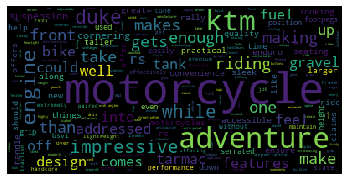

In [26]:
#wordcloud
word_freq=calculate_frequencies(file_contents)
#cloud = wordcloud.WordCloud(scale=1,height=900, width=1600, max_words=200, background_color='brown', relative_scaling=.6, min_font_size=10)
cloud = wordcloud.WordCloud()
cloud.generate_from_frequencies(word_freq)
myimage=cloud.to_array()
#myimage = calculate_frequencies(file_contents)
#print(myimage)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [25]:
# Download image. Can provide path as cloud.to_file(r'C:\Users\Owner\Desktop\WC.png')
cloud.to_file('WC.png')